In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split,cross_val_predict
from xgboost import XGBClassifier
import warnings
import matplotlib.pyplot as plt
from sklearn import tree
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn import preprocessing
import statsmodels.api as sm
import pylab



In [2]:
#pip install xgboost

**Cardio Disease Data**

In [3]:
df = pd.read_csv("cardio_train.csv", sep = ";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df = df.drop("id", axis = 1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df["age"] = np.round(df["age"]/365.25)
df["gender"] = df["gender"].map({2:1, 1:0})

In [6]:
data = pd.get_dummies(df, columns = ["cholesterol", "gluc"])

In [7]:
data

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,50.0,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,55.0,0,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,52.0,0,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,48.0,1,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,48.0,0,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,1,168,76.0,120,80,1,0,1,0,1,0,0,1,0,0
69996,62.0,0,158,126.0,140,90,0,0,1,1,0,1,0,0,1,0
69997,52.0,1,183,105.0,180,90,0,1,0,1,0,0,1,1,0,0
69998,61.0,0,163,72.0,135,80,0,0,0,1,1,0,0,0,1,0


In [8]:
y = data.cardio
X = data.drop(['cardio'], axis = 1)
# regex = re.compile(r"\[|\]|<", re.IGNORECASE)
# X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
features = list(X.columns)

<AxesSubplot:>

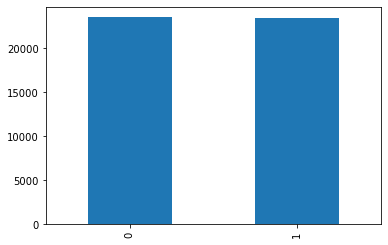

In [10]:
y_train.value_counts().plot(kind='bar')

***Decision Tree***

In [11]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [12]:
acc_decision_tree = round(dtree.score(X_train, y_train) * 100, 2)
acc_decision_tree

97.91

In [13]:
acc_test_decision_tree = round(dtree.score(X_test, y_test) * 100, 2)
acc_test_decision_tree

63.47

***XGBoost***

In [14]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(classification_report(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75     11506
           1       0.76      0.69      0.72     11594

    accuracy                           0.74     23100
   macro avg       0.74      0.74      0.73     23100
weighted avg       0.74      0.74      0.73     23100



In [15]:
y_XGBpred = cross_val_predict(XGBClassifier(), X_test, y_test)
print(classification_report(y_test, y_XGBpred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     11506
           1       0.75      0.70      0.72     11594

    accuracy                           0.73     23100
   macro avg       0.73      0.73      0.73     23100
weighted avg       0.73      0.73      0.73     23100



***Kmeans***

In [16]:
ms = MinMaxScaler()

X_t = ms.fit_transform(X)

In [17]:
X_t = pd.DataFrame(X_t, columns=[features])

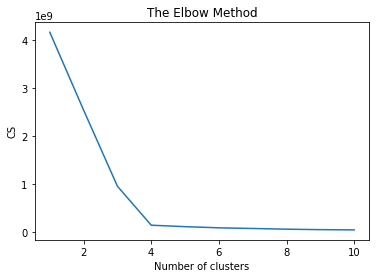

In [18]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_


correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 34877 out of 70000 samples were correctly labeled.
Accuracy score: 0.50


**Spending Data**

In [52]:
# spending data
spending_df = pd.read_csv("insurance.csv")

In [53]:
spending_df[['sex', 'smoker', 'region']] = spending_df[['sex', 'smoker', 'region']].astype('category')
spending_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [54]:
spending_df.replace({'sex': {'female': 1, 'male': 0}}, inplace=True)
spending_df.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)



In [56]:
spending_df = pd.get_dummies(spending_df, columns = ["region"])

In [57]:
spending_df.dtypes
spending_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [58]:
spending_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [59]:
nor_list = preprocessing.normalize([spending_df["charges"]])
nor_list = nor_list.tolist()[0]

In [60]:
spending_df = spending_df.drop(['charges'], axis=1)
df_charge = pd.DataFrame (nor_list, columns = ['charges'])
spending_df = spending_df.join(df_charge)
spending_df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,27.900,0,1,0,0,0,1,0.025698
1,18,0,33.770,1,0,0,0,1,0,0.002626
2,28,0,33.000,3,0,0,0,1,0,0.006772
3,33,0,22.705,0,0,0,1,0,0,0.033460
4,32,0,28.880,0,0,0,1,0,0,0.005885
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0,0.016134
1334,18,1,31.920,0,0,1,0,0,0,0.003357
1335,18,1,36.850,0,0,0,0,1,0,0.002481
1336,21,1,25.800,0,0,0,0,0,1,0.003056


***Linear Regression***

In [61]:
y = spending_df['charges']
x = spending_df.drop(['charges'], axis = 1)
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.33, random_state=42)
lg = LinearRegression()
lg.fit(x_train, y_train)

y_pred_train = lg.predict(x_train)
y_pred_test = lg.predict(x_test)
train_score = lg.score(x_train, y_train)
test_score = lg.score(x_test, y_test)
train_error = mean_squared_error(y_train,y_pred_train)
test_error = mean_squared_error(y_test, y_pred_test)
print('Train Score:', train_score, 'Test Score:', test_score)
print('Train error:', train_error, 'Test error:', test_error)



Train Score: 0.7456141330086123 Test Score: 0.7605492639270065
Train error: 8.633043042747849e-05 Test error: 8.128353585764267e-05


***Ridge***

In [62]:
alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10]
ridgecv = RidgeCV(alphas = [1e-8, 1e-5, 0.1, 1, 10])
ridgecv.fit(x_train, y_train)
print('Best alpha =', ridgecv.alpha_)
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(x_train, y_train)
train_score = ridge.score(x_train, y_train)
test_score = ridge.score(x_test, y_test)
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(x_train, y_train)
y_predicted_train = ridge.predict(x_train)
y_predicted_test = ridge.predict(x_test)
train_error = mean_squared_error(y_train,y_predicted_train)
test_error = mean_squared_error(y_test, y_predicted_test)
print('Train Score:', train_score, 'Test Score:', test_score)
print('Train_error:', train_error, 'Test_error:', test_error)    

Best alpha = 0.1
Train Score: 0.7456138431195847 Test Score: 0.7605356326257681
Train_error: 8.633052880654661e-05 Test_error: 8.128816311576337e-05


***Lasso***

In [63]:
lassocv = LassoCV(alphas = [1e-3, 1e-2, 1e-1, 1])
lassocv.fit(x_train, y_train)
print('Best alpha =', lassocv.alpha_)
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(x_train, y_train)
y_predicted_train = lasso.predict(x_train)
y_predicted_test = lasso.predict(x_test)
train_score = lasso.score(x_train, y_train)
test_score = lasso.score(x_test, y_test)
train_error = mean_squared_error(y_train,y_predicted_train)
test_error = mean_squared_error(y_test, y_predicted_test)
print('Train Score:', train_score, 'Test Score:', test_score)
print('Train_error:', train_error, 'Test_error:', test_error)

Best alpha = 0.001
Train Score: 0.7253498232093774 Test Score: 0.7364800651120886
Train_error: 9.320748931433462e-05 Test_error: 8.945402477332806e-05
